# Description:
In this notebook the some of the properties of the antennas as simulated by NuRadioReco are investigated as a result of weird behaviour seen in simulation results.

# 2024-12-10: Rotation of antennas Sim summary plot

In [1]:
FilePaths=[['GNSim-St23Ch13-544514-m30-Tot.pkl','GNSim-St23Ch13-544558-p0-Tot.pkl','GNSim-St23Ch13-544572-p30-Tot.pkl'],
           ['GNSim-St23Ch16-544514-m30-Tot.pkl','GNSim-St23Ch16-544558-p0-Tot.pkl','GNSim-St23Ch16-544572-p30-Tot.pkl'],
           ['GNSim-St23Ch19-544514-m30-Tot.pkl','GNSim-St23Ch19-544558-p0-Tot.pkl','GNSim-St23Ch19-544572-p30-Tot.pkl'],
          ]
FilePaths=[['/pnfs/iihe/rno-g/store/user/jstoffels/Jobs/GalacticNoise/Sim/V_RotAEPhiRot/St23/' + path for path in pathList] for pathList in FilePaths]

In [4]:
def RotPlot(FilePaths,TimeFormat="LST",NBins=4*24,StdCut=(-1,-1),HardCut=-0.0035,ZeroAvg=False,SavePath="",Format="pdf"):
    """ Plots the curves for multiple files.
    Parameters:
    DataFileId= Name of the file where the data is stored.
    SimFileId= Name of the file where the simulated results are stored.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as scst
    import pandas as pd
    import matplotlib as mpl
    import datetime

    #Color palette: https://lospec.com/palette-list/curiosities
    Colors=['#46425e',
'#15788c',
'#00b9be',
'#ffeecc',
'#ffb0a3',
'#ff6973']
    LineStyles=['dotted','solid','dashed']
    ylim=(1.7,2)
    f, axs = plt.subplots(1, 1, figsize=(15,5.56))
    plt.rcParams['legend.title_fontsize'] = 15
    axs.add_patch(mpl.patches.Rectangle((0,ylim[0]), 24, ylim[1]-ylim[0],color=Colors[3],alpha=0.5))
    if ZeroAvg:
        RefMed=np.median(pd.read_pickle(FilePaths[0])["VRMS"])
        plt.figtext(0.141, 0.8, "Set to median: %.2f mV" % (1e3*RefMed), fontsize=18,bbox=dict(edgecolor='black', facecolor='none', alpha=0.2, pad=10.0))
    for ChIdx, ChFilePath in enumerate(FilePaths):
        for FPIdx,FilePath in enumerate(ChFilePath):
            #Import data   
            GNData=pd.read_pickle(FilePath)
            BinEdges=np.linspace(0,24,NBins+1,True)
            GNData['Bin'] = pd.cut(GNData[TimeFormat], BinEdges)
    
            if HardCut>0:
                GNData=HardCut(GNData,Threshold)
            
            if np.all(np.array(StdCut)>0):
                GNData=StdCut(GNData,StdCut)
            
            #Compute relevant statistics
            GNBinStat=GNData.groupby(["Bin"],observed=False).agg({"VRMS":['median',(lambda x: np.std(x)/np.sqrt(len(x))) ]})
            GNPlotFilter=GNBinStat[('VRMS', 'median')].isnull()
            GNVRMSMed=GNBinStat[('VRMS', 'median')].drop(GNBinStat[('VRMS', 'median')][GNPlotFilter].index)
            GNVRMSStd=GNBinStat[('VRMS', '<lambda_0>')].drop(GNBinStat[('VRMS', 'median')][GNPlotFilter].index).fillna(0)
    
            MidBins=np.array([(BinEdges[i] + BinEdges[i+1])/2 for i in range(0,len(BinEdges)-1)])[np.logical_not(GNPlotFilter)]
        
        #Count the amount of entries in the transit curve
        # NEntries=GN1.shape[0]
        
            if ZeroAvg: 
                GNVRMSMed-=(np.median(GNData["VRMS"])-RefMed)
            #plt.errorbar(MidBins,1000*GNVRMSMed,yerr=1000*GNVRMSStd,zorder=2,color=Colors[[1,2,5][ChIdx]],linestyle=LineStyles[FPIdx]) #.split('-')[-2]
            plt.plot(MidBins,1000*GNVRMSMed,zorder=2,color=Colors[[1,2,5][ChIdx]],linestyle=LineStyles[FPIdx]) #.split('-')[-2]
            #(FilePath.split("/")[-1])
            # ,label=('Ch' + FilePath.split("/")[-1][12:14]) if FPIdx==1 else None
    plt.grid(color='grey', linestyle='-', linewidth=1,alpha=0.5)
    plt.title("Rotated antenna transit curves St23",fontsize=25)
    plt.xlabel(TimeFormat + " Time (hrs)",fontsize=20)#20)
    plt.ylabel("V_RMS (mV)",fontsize=20)#20)
    plt.xticks(np.arange(0, 25, 1.0),fontsize=25)#15)
    plt.yticks(fontsize=25)#15)
    plt.xlim(0,24)
    #plt.legend(loc="lower left",fontsize=15)
    ax=plt.gca()
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    #ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 #box.width, box.height * 0.9])
    #plt.plot([], [],  label="Channel number")
    # plt.plot([], [], color=Colors[0],linestyle=LineStyles[1], label="Ch13")
    # plt.plot([], [], color=Colors[1],linestyle=LineStyles[1], label="Ch16")
    # plt.plot([], [], color=Colors[2],linestyle=LineStyles[1], label="Ch19")
    #plt.plot([], [],  label="Rotation")
    axs.plot([], [], color='k',linestyle=LineStyles[0], label="Phi - deg")
    axs.plot([], [], color='k',linestyle=LineStyles[1], label="Phi + 0 deg")
    axs.plot([], [], color='k',linestyle=LineStyles[2], label="Phi + 30 deg")
    
    
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
    #      fancybox=True, shadow=True, ncol=2,fontsize=17,title='Channel Number'+10*' '+'Rotation')
    lines = plt.gca().get_lines() 
    legend1 = plt.legend([lines[i] for i in [1,4,7]], ["Ch13", "Ch16", "Ch19"], loc=(0.75,0.0125),title='Channel',fontsize=14,framealpha=0.6)
    legend2 = plt.legend([lines[i] for i in [9,10,11]], [r"$\phi$ - 30$^\circ$", r"$\phi$ + 0$^\circ$", r"$\phi$ + 30$^\circ$"], loc=(0.865,0.0125),title='Rotation',fontsize=14,framealpha=0.6)
    axs.add_artist(legend1)
    axs.add_artist(legend2)
    plt.ylim(*ylim)
    plt.savefig("./Figures/RotatedAETcurves-"+f"_{datetime.datetime.now().strftime('%y-%m-%d_%H%M')}"+"."+Format, format=Format, bbox_inches="tight")
    plt.show()
    return

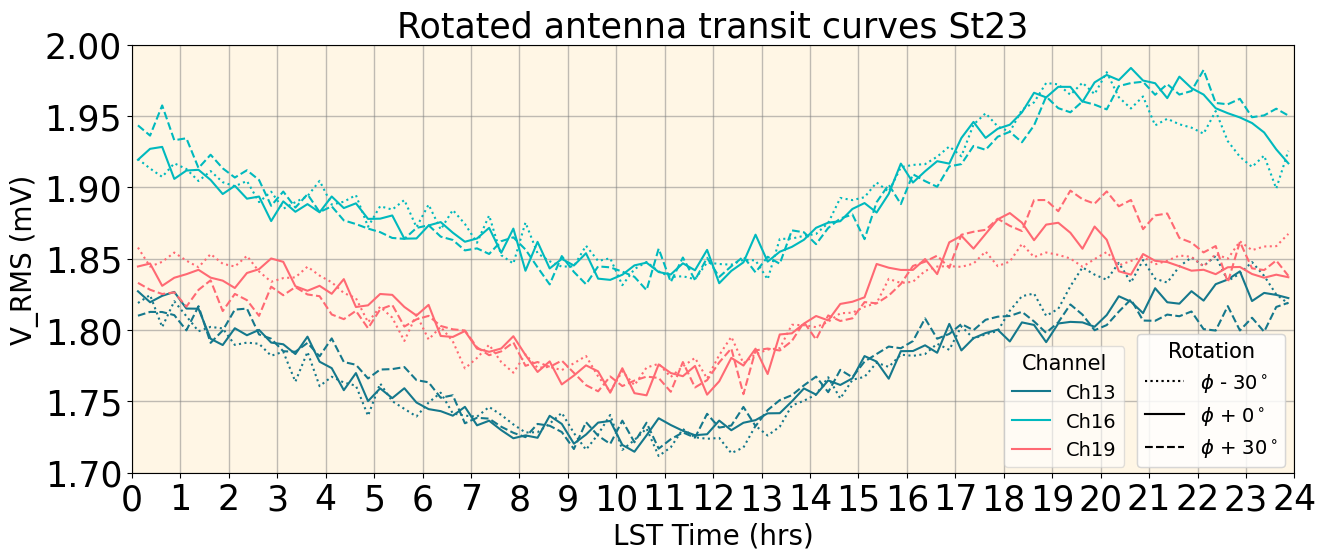

In [5]:
RotPlot(FilePaths,TimeFormat="LST",NBins=4*24,StdCut=(-1,-1),HardCut=-0.0035,ZeroAvg=False,Format="png")

# 2025-01-02: Converging iterative TTemp procedure 

In [2]:
#For jobNr 659737
Sim={13:[(150,1.602),(290,1.846),(438.17,1.985),(528.25,2.116),(520.1,2.065),(552.14,2.101),(555.48,2.114)],
     16:[(150,1.754),(290,1.938),(658.24,2.38),(694.27,2.423),(695.25,2.366),(747.34,2.479),(702.61,2.436)],
     19:[(150,1.654),(290,1.801),(612.13,2.229),(538.99,2.14),(537.71,2.11),(562.03,2.197),(517.74,2.13)]}
DataVRMS={13:2.105,16:2.424,19:2.138}

In [1]:
#For jobNr 722298
Sim={13:[(150,2.525),(290,2.921),(361.99,3.122),(362.66,3.138),(357.69,3.104),(365.02,3.126),(364.27,3.125)],
     16:[(150,2.679),(290,3.128),(451.79,3.554),(483.84,3.626),(490.96,3.686),(477.5,3.631),(483.04,3.639)],
     19:[(150,2.577),(290,3.020),(355.59,3.175),(373.56,3.249),(366.4,3.224),(367.71,3.239),(364.14,3.231)]}
DataVRMS={13:3.124,16:3.647,19:3.228}

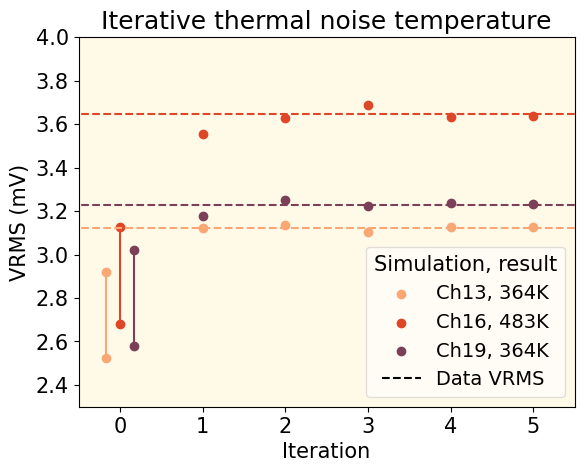

In [7]:
def TTempConvPlot(Sim,DataVRMS):
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as scst
    import pandas as pd
    import matplotlib as mpl
    import datetime
    Format="jpg"
    colors=[
    '#1c1852',
    '#3d4699',
    '#c74995',
    '#68a9d1',
    '#fff9ed'
    ]
    colors=[
    '#7c3f58',
    '#de4628',
    '#f9a875',
    '#fff6d3'
    ]

    Colors={13:colors[2],16:colors[1],19:colors[0]}
    ylim=(2.3,4)
    xlim=(-0.5,5.5)
    f, axs = plt.subplots(1, 1)#, figsize=(15,5.56))
    plt.rcParams['legend.title_fontsize'] = 15
    axs.add_patch(mpl.patches.Rectangle((xlim[0],ylim[0]), xlim[1]-xlim[0], ylim[1]-ylim[0],color=colors[3],alpha=0.5))
    
    for ChNr,value in Sim.items():
        VRMS=[t[1] for t in value]
        plt.scatter(range(1,len(VRMS[2:])+1),VRMS[2:],color=Colors[ChNr],label="Ch"+str(ChNr)+', ' + str(np.round(Sim[ChNr][-1][0]))[:-2] + 'K')
        plt.plot(((ChNr-16)/18)*np.ones(2),VRMS[:2],color=Colors[ChNr],marker="o")
        
        
    for ChNr,value in DataVRMS.items():
        plt.hlines(value,-1,7,color=Colors[ChNr],linestyle='dashed')

    axs.plot([], [], color='k',linestyle="dashed", label="Data VRMS")
    

    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.title("Iterative thermal noise temperature",fontsize=18)
    plt.xlabel("Iteration",fontsize=15)
    plt.ylabel('VRMS (mV)',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right",title='Simulation, result',fontsize=14,framealpha=0.6)
    plt.savefig("./Figures/CalcTTempIter"+f"_{datetime.datetime.now().strftime('%y-%m-%d_%H%M')}"+"."+Format, format=Format, bbox_inches="tight")
    plt.show()
    return

TTempConvPlot(Sim,DataVRMS)

Ch 13 : [-1.36243337e-07  2.88633065e-03  2.09514422e+00]
T= 362.66650788796125
Ch 16 : [-1.37751887e-06  3.75761891e-03  2.14825028e+00]
T= 485.1368837898674
Ch 19 : [-1.61182347e-06  3.83333611e-03  2.03884156e+00]
T= 366.7807969588768


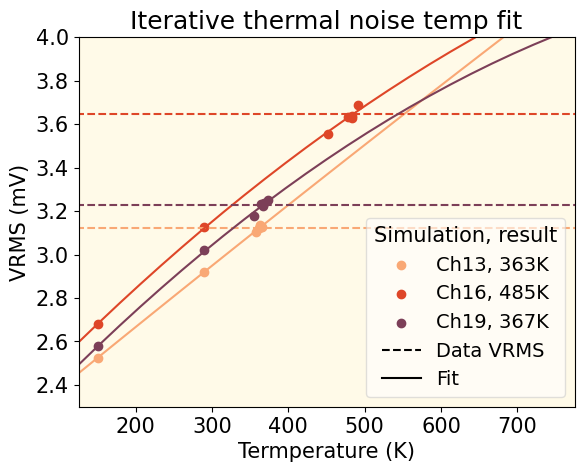

In [8]:
def TvsVRMSPlot(Sim,DataVRMS):
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as scst
    import pandas as pd
    import matplotlib as mpl
    import datetime
    from numpy.polynomial import Polynomial
    Format="jpg"

    colors=[
    '#7c3f58',
    '#de4628',
    '#f9a875',
    '#fff6d3'
    ]
    Colors={13:colors[2],16:colors[1],19:colors[0]}

    ylim=(2.3,4)
    xlim=(125,775)

    TRes={}
    
    f, axs = plt.subplots(1, 1)#, figsize=(15,5.56))
    plt.rcParams['legend.title_fontsize'] = 15
    axs.add_patch(mpl.patches.Rectangle((xlim[0],ylim[0]), xlim[1]-xlim[0], ylim[1]-ylim[0],color=colors[3],alpha=0.5))
    
    for ChNr,value in Sim.items():
        VRMS=[t[1] for t in value]
        T=[t[0] for t in value]
        
        coef=np.polyfit(T,VRMS, 2)
        xfit=np.linspace(*xlim,25)
        p=np.poly1d(coef)
        yfit=p(xfit)
        print('Ch',ChNr,':',coef)
        poly = Polynomial(coef[::-1])
        TRes[ChNr] = np.min(np.abs((poly - DataVRMS[ChNr]).roots()))
        print('T=',TRes[ChNr])
        plt.scatter(T,VRMS,color=Colors[ChNr],label="Ch"+str(ChNr)+', ' + str(np.round(TRes[ChNr]))[:-2] + 'K')
        plt.plot(xfit,yfit,color=Colors[ChNr],alpha=1)
        plt.hlines(DataVRMS[ChNr],0,1e3,color=Colors[ChNr],linestyle='dashed')

    axs.plot([], [], color='k',linestyle="dashed", label="Data VRMS")
    axs.plot([], [], color='k', label="Fit")
    
    plt.legend(loc="lower right",title='Simulation, result',fontsize=14,framealpha=0.6)
    plt.title("Iterative thermal noise temp fit",fontsize=18)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xlabel("Termperature (K)",fontsize=15)
    plt.ylabel('VRMS (mV)',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("./Figures/CalcTTempFit"+f"_{datetime.datetime.now().strftime('%y-%m-%d_%H%M')}"+"."+Format, format=Format, bbox_inches="tight")
    plt.show()
    
    return
    
TvsVRMSPlot(Sim,DataVRMS)